In [1]:
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
import time
import getpass
import os

In [6]:
%%capture
password = getpass.getpass()
command = "sudo -S apt install traceroute" #can be any command but don't forget -S as it enables input from stdin
os.system('echo %s | %s' % (password, command))

[sudo] password for rohinsood: 



Reading package lists...
Building dependency tree...
Reading state information...
traceroute is already the newest version (1:2.1.0-2).
0 upgraded, 0 newly installed, 0 to remove and 78 not upgraded.


In [7]:
!traceroute google.com

traceroute to google.com (172.217.12.142), 30 hops max, 60 byte packets
 1  Circle.mshome.net (172.19.240.1)  0.595 ms  0.574 ms  0.565 ms
 2  192.168.0.1 (192.168.0.1)  3.534 ms  3.528 ms  3.523 ms
 3  syn-142-254-184-077.inf.spectrum.com (142.254.184.77)  18.667 ms  18.661 ms  17.013 ms
 4  lag-62.sndhcaiw01h.netops.charter.com (76.167.17.73)  39.350 ms  39.343 ms  39.336 ms
 5  lag-28.sndhcaax01r.netops.charter.com (72.129.2.118)  22.413 ms  22.405 ms  22.399 ms
 6  lag-22.rcr01lsancarc.netops.charter.com (72.129.1.0)  13.665 ms  20.171 ms  20.159 ms
 7  syn-072-129-001-191.inf.spectrum.com (72.129.1.191)  20.150 ms  19.927 ms  14.652 ms
 8  108.170.252.101 (108.170.252.101)  22.053 ms 108.170.226.21 (108.170.226.21)  26.894 ms *
 9  209.85.244.169 (209.85.244.169)  26.818 ms 142.251.60.128 (142.251.60.128)  26.809 ms 142.251.60.130 (142.251.60.130)  26.764 ms
10  lga34s19-in-f14.1e100.net (172.217.12.142)  26.764 ms  26.715 ms  26.708 ms


In [19]:
ip_addresses = ["172.19.240.1", "192.168.0.1", "142.254.184.77", "76.167.17.73", "72.129.2.118"]
request_count = 120
csv_file = 'ping_results.csv'

In [20]:
# Function to ping an IP address and return the latency
def ping(ip):
    try:
        output = subprocess.run(["ping", "-c", "1", ip], capture_output=True, text=True, timeout=2)
        if "time=" in output.stdout:
            latency = output.stdout.split("time=")[1].split(" ms")[0]
            return float(latency)
        else:
            return None
    except subprocess.TimeoutExpired:
        return None

In [21]:
columns = ['Request Number'] + [f'{ip} Latency (ms)' for ip in ip_addresses]
df = pd.DataFrame(columns=columns)

# ping 1000 times
for i in range(1, request_count + 1):
    row = [i]
    for ip in ip_addresses:
        latency = ping(ip)
        row.append(latency if latency is not None else None)  # Use None for timeouts
    df.loc[i - 1] = row
    print(f"Request {i} completed.")
    time.sleep(0.1)

# Save df to CSV
df.to_csv(csv_file, index=False)
print(f"Results saved to {csv_file}")

Request 1 completed.
Request 2 completed.
Request 3 completed.
Request 4 completed.
Request 5 completed.
Request 6 completed.
Request 7 completed.
Request 8 completed.
Request 9 completed.
Request 10 completed.
Request 11 completed.
Request 12 completed.
Request 13 completed.
Request 14 completed.
Request 15 completed.
Request 16 completed.
Request 17 completed.
Request 18 completed.
Request 19 completed.
Request 20 completed.
Request 21 completed.
Request 22 completed.
Request 23 completed.
Request 24 completed.
Request 25 completed.
Request 26 completed.
Request 27 completed.
Request 28 completed.
Request 29 completed.
Request 30 completed.
Request 31 completed.
Request 32 completed.
Request 33 completed.
Request 34 completed.
Request 35 completed.
Request 36 completed.
Request 37 completed.
Request 38 completed.
Request 39 completed.
Request 40 completed.
Request 41 completed.
Request 42 completed.
Request 43 completed.
Request 44 completed.
Request 45 completed.
Request 46 complete

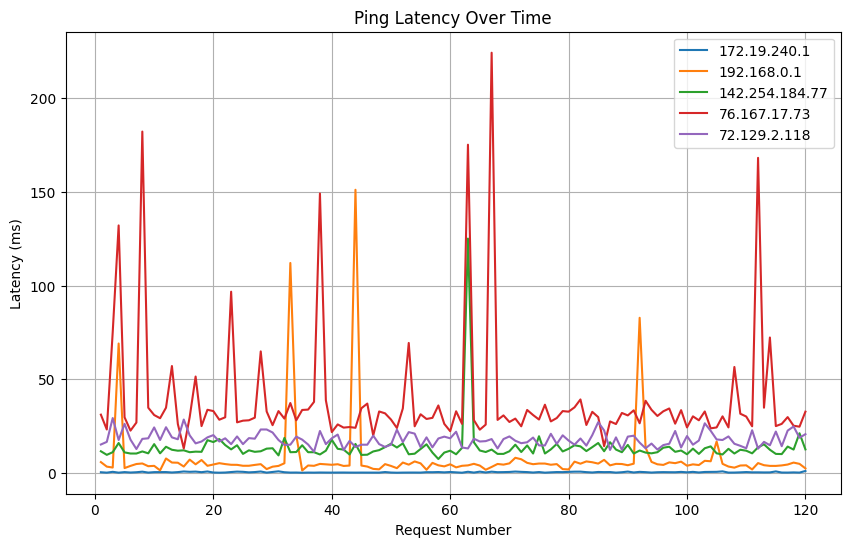

In [22]:
plt.figure(figsize=(10, 6))

# PLot latencies for each IP address
for ip in ip_addresses:
    plt.plot(df['Request Number'], df[f'{ip} Latency (ms)'], label=f'{ip}')

plt.title('Ping Latency Over Time')
plt.xlabel('Request Number')
plt.ylabel('Latency (ms)')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
# df = pd.read_csv(csv_file)

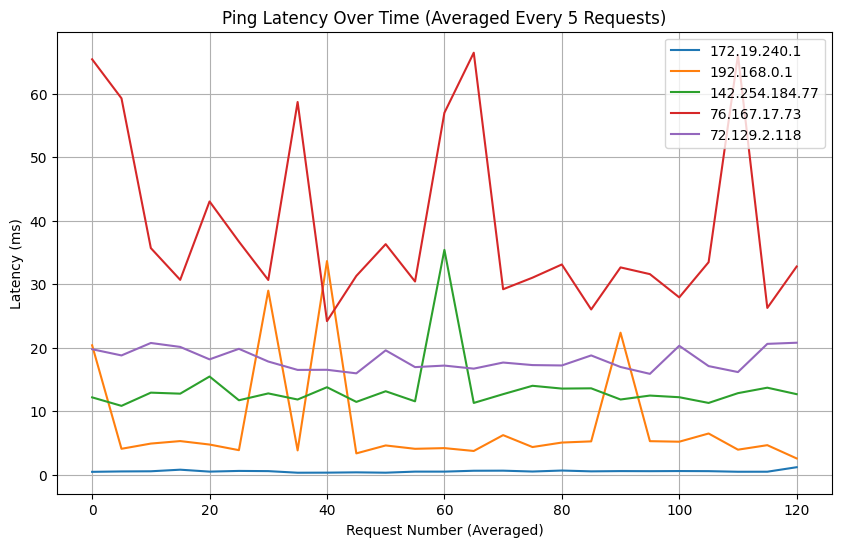

In [24]:
avg_count = 5

# Group the DataFrame by chunks of 50 requests and calculate the mean latency for each group
df_avg = df.groupby(df['Request Number'] // avg_count).mean()

# Plot the results
plt.figure(figsize=(10, 6))

# Plot averaged latencies for each IP address
for ip in ip_addresses:
    plt.plot(df_avg.index * avg_count, df_avg[f'{ip} Latency (ms)'], label=f'{ip}')

plt.title(f'Ping Latency Over Time (Averaged Every {avg_count} Requests)')
plt.xlabel('Request Number (Averaged)')
plt.ylabel('Latency (ms)')
plt.legend()
plt.grid(True)
plt.show()
